In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Imported the common libraries.

In [5]:
data=pd.read_csv("/home/xolo/Downloads/archive/file.csv")

Imported csv file for training and testing our model.

In [6]:
data.head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


To see top 50 rows of our dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


To see the information of our dataset and which type of data it contain , how many rows and column are their.

In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

To obtain the sum of all the null values in the columns.

In [9]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

To replace all the null value of Item_Weight column with its mean.

In [10]:
from sklearn.preprocessing import OrdinalEncoder

Importing the library for treating ordinal data in our dataset.

In [11]:
ordenc=OrdinalEncoder()
data['Outlet_Size'] =ordenc.fit_transform(data[["Outlet_Size"]])
data['Item_Fat_Content']=ordenc.fit_transform(data[["Item_Fat_Content"]])
data['Item_Type']=ordenc.fit_transform(data[["Item_Type"]])
data['Outlet_Type']=ordenc.fit_transform(data[["Outlet_Type"]])
data['Outlet_Location_Type']=ordenc.fit_transform(data[["Outlet_Location_Type"]])

To transform the ordinal data of columns Outlet_Size,Item_Fat_Content,Item_Type,Outlet_Type,Outlet_Location_Type into numerical form.

In [12]:
data['Outlet_Size'].mode()

0    1.0
dtype: float64

To find the mode of the column Outlet_Size.

In [13]:
data['Outlet_Size'].fillna(1.0,inplace=True)

To replace the all the null values of column Outlet_Size with its mode.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   float64
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   float64
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   float64
 9   Outlet_Location_Type       8523 non-null   float64
 10  Outlet_Type                8523 non-null   float64
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 799.2+ KB


Rechecking the info of dataset.

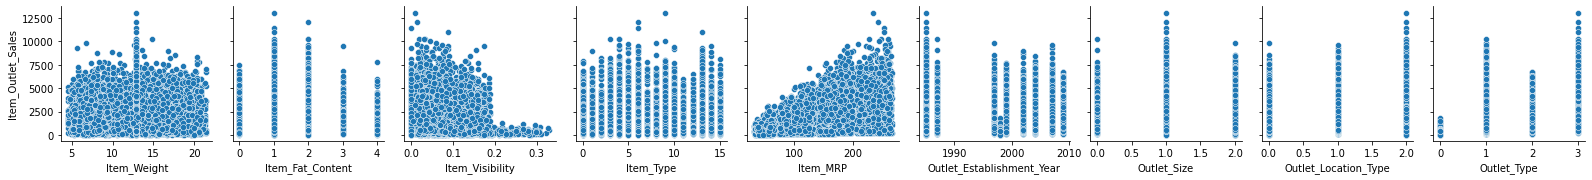

In [15]:
import seaborn as sns
sns.pairplot(data,x_vars=["Item_Weight","Item_Fat_Content","Item_Visibility","Item_Type","Item_MRP","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type"],y_vars="Item_Outlet_Sales",kind='scatter')
plt.show()

To see the graph of different inputs with the particular output data i.e. Item_Outlet_Sales.

In [16]:
num=data.select_dtypes(include=np.number)
num.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Establishment_Year,-0.008301,-0.000189,-0.074834,0.004970,0.005020,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.007225,-0.012058,0.069309,-0.001859,0.006059,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.089216,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,-0.004214,-0.173468,0.003053,-0.001975,-0.122304,-0.201483,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.011550,0.009800,-0.128625,0.017048,0.567574,-0.049135,-0.086182,0.089367,0.401522,1.000000


To see the correlation between different columns.

From above data we can conclude that Item_Outlet_Sales depends major on Item_MRP and Outlet_Type.

In [17]:
x=data["Item_MRP"]
y=data["Item_Outlet_Sales"]

Define x and y for our Linear Regression model.

In [18]:
x=x.to_numpy()
y=y.to_numpy()
x=x.reshape(-1,1)
y=y.reshape(-1,1)

Converting our x and y data field into same shape and to do so we have to convert the series datatype into array datatype of x and y variable.

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=40)

Spliting our data of x and y into two differents parts to train and test our model.

In [20]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)

LinearRegression()

Creating our Linear Regression model.

In [21]:
y_linreg=model.predict(x_test)

Testing our model.

In [22]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test,y_linreg)
mae=mean_absolute_error(y_test,y_linreg)
r2=r2_score(y_test,y_linreg)
rmse = np.sqrt(mse)
print("Root Mean Squared Error : ", rmse)
print("Mean Absolute Error : ", mae)

Root Mean Squared Error :  1373.0368833288644
Mean Absolute Error :  1033.50580723787


To find the amount of error in our model.

In [24]:
find=pd.read_csv("/home/xolo/Downloads/archive/predict.csv")
find['Item_Weight'].fillna(find['Item_Weight'].mean(),inplace=True)
find.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Importing the new dataset in which we have to predict the sales of the given data. And printing info about tha dataset.

In [ ]:
y_test=find["Item_MRP"]
y_test=y_test.to_numpy()
y_test=y_test.reshape(-1,1)
predict=model.predict(y_test)


Aloting the variable to column "Item_MRP" of predict dataset set on which our sale mostly depend upon, and then reshaping it and predicting the sale of that dataset.

In [ ]:
predict

And printing the predicted sale of the given dataset i.e. "predict.scv".